In [20]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
!kaggle datasets download -d salader/content/titanic.zip

400 - Bad Request - Invalid datasetVersionNumber value


In [23]:
# Load the dataset
import zipfile
zip_ref= zipfile.ZipFile('/content/titanic.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
train_dir = '/content/train.csv'
test_dir = '/content/test.csv'

In [55]:
# Load the dataset
titanic_data = pd.read_csv("train.csv")

In [56]:
# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [57]:
# Data Exploration
print(titanic_data.info())
print(titanic_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [58]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [60]:
# Data Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [61]:
# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

In [62]:
# Feature Selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_data[features]
y = titanic_data['Survived']

In [63]:
# Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 16]
 [19 55]]


In [115]:
titanic_data.shape

(891, 15)

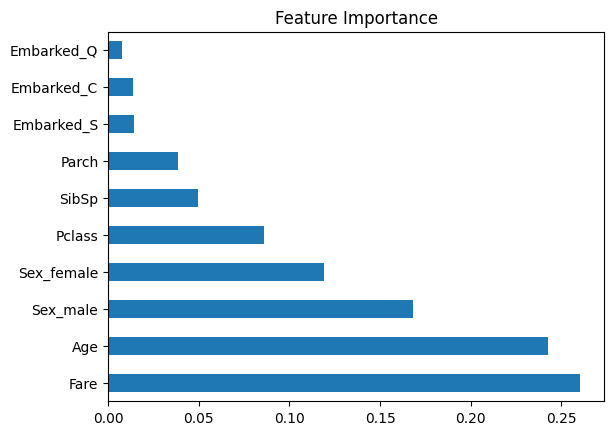

In [67]:
# Visualization
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

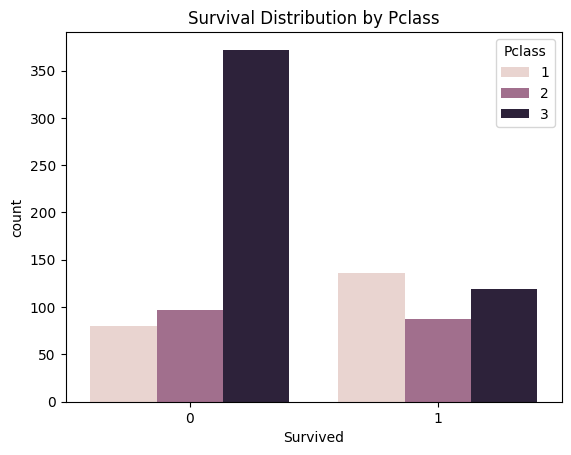

In [90]:
# Survival distribution by Pclass
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Distribution by Pclass')
plt.show()

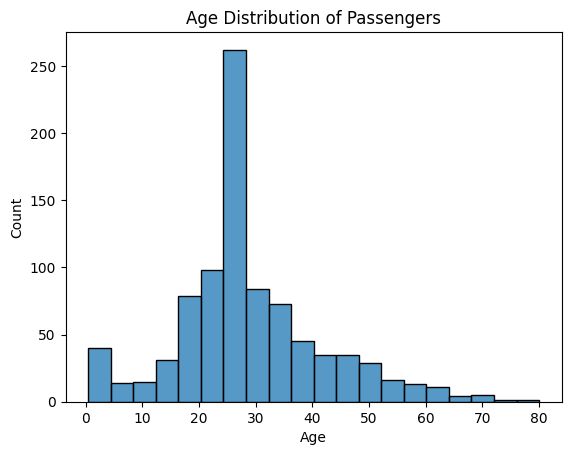

In [86]:
# Age distribution of passengers
sns.histplot(titanic_data['Age'], bins=20)
plt.title('Age Distribution of Passengers')
plt.show()

<Axes: >

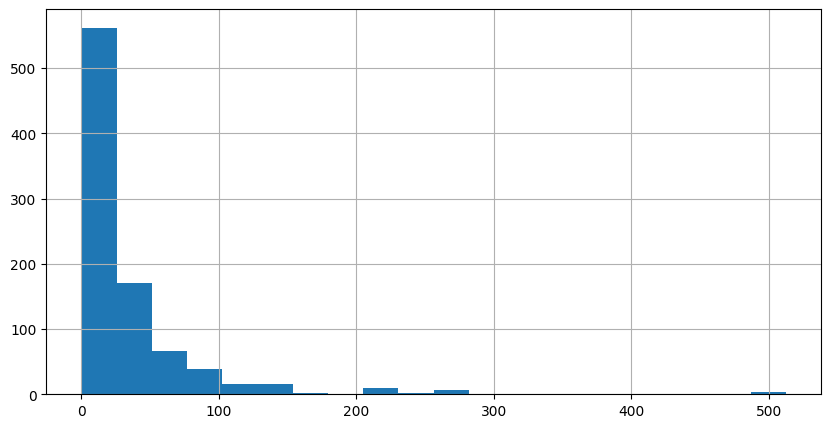

In [122]:
titanic_data['Fare'].hist(bins=20,figsize=(10,5))

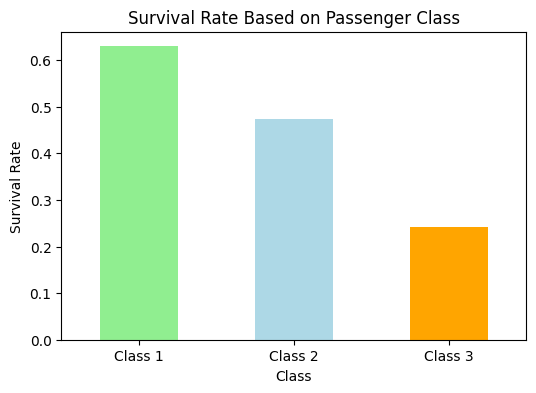

In [131]:
# Visualize survival rate based on passenger class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_class.plot(kind='bar', color=['lightgreen', 'lightblue', 'orange'])
plt.title('Survival Rate Based on Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.show()

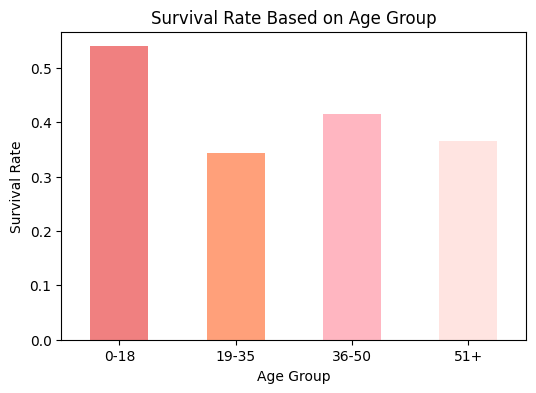

In [133]:
# Create age groups
age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51+']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Visualize survival rate based on age group
survival_by_age = titanic_data.groupby('AgeGroup')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_age.plot(kind='bar', color=['lightcoral', 'lightsalmon', 'lightpink', 'mistyrose'])
plt.title('Survival Rate Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

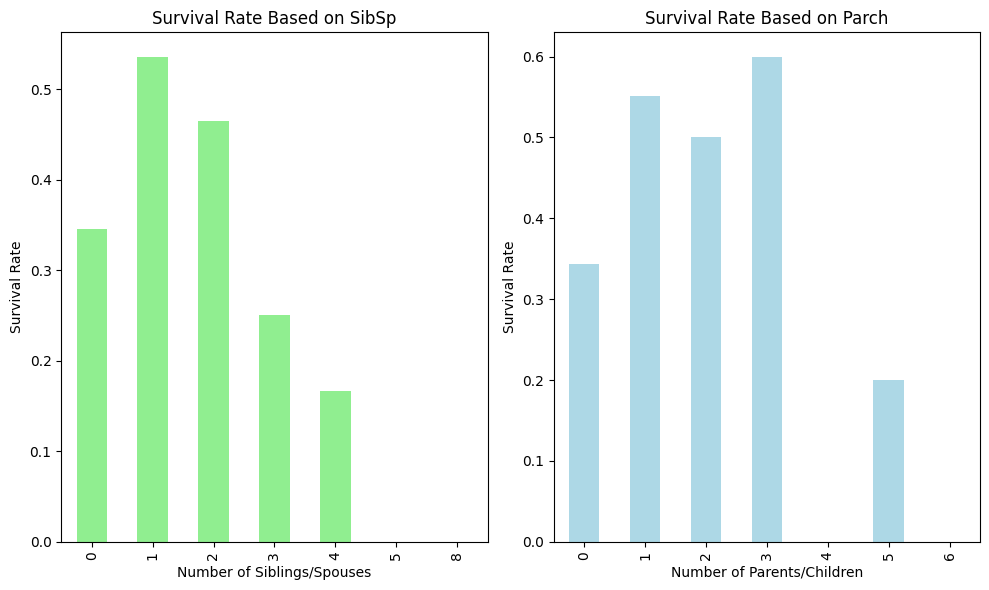

In [134]:
# Visualize survival rate based on SibSp and Parch
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
survival_by_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()
survival_by_sibsp.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate Based on SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

plt.subplot(1, 2, 2)
survival_by_parch = titanic_data.groupby('Parch')['Survived'].mean()
survival_by_parch.plot(kind='bar', color='lightblue')
plt.title('Survival Rate Based on Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

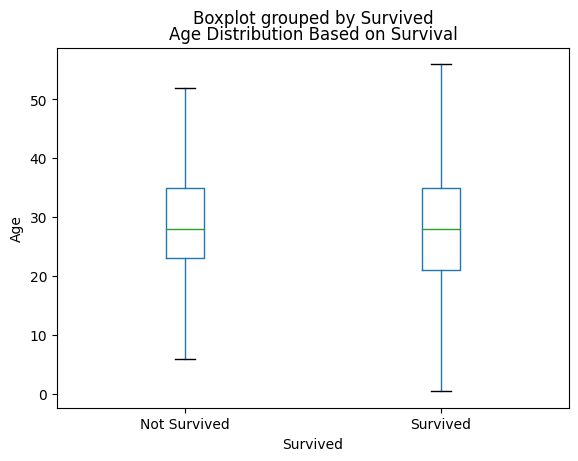

In [135]:
# Box plot of age distribution based on survival
plt.figure(figsize=(6, 4))
titanic_data.boxplot(column='Age', by='Survived', grid=False, showfliers=False)
plt.title('Age Distribution Based on Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([1, 2], ['Not Survived', 'Survived'])
plt.show()

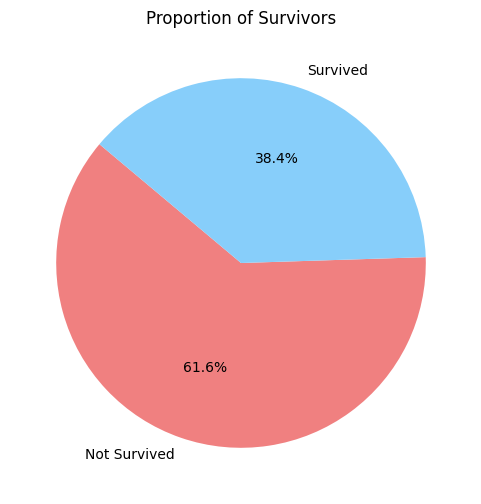

In [136]:
# Pie chart showing the proportion of survivors
survivor_counts = titanic_data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(survivor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Survivors')
plt.show()

Text(0.5, 1.0, 'Survival Based on Pclass')

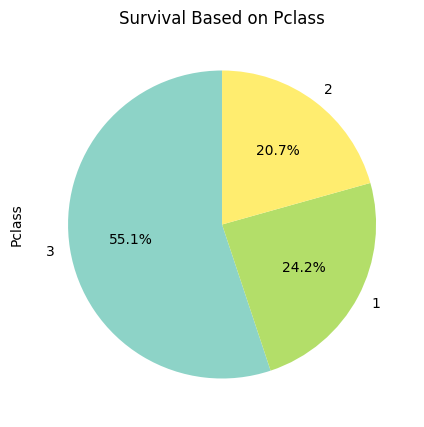

In [139]:
# Assuming you have loaded your dataset into a DataFrame named data
# Pie chart for survival based on Pclass
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
titanic_data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Survival Based on Pclass')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



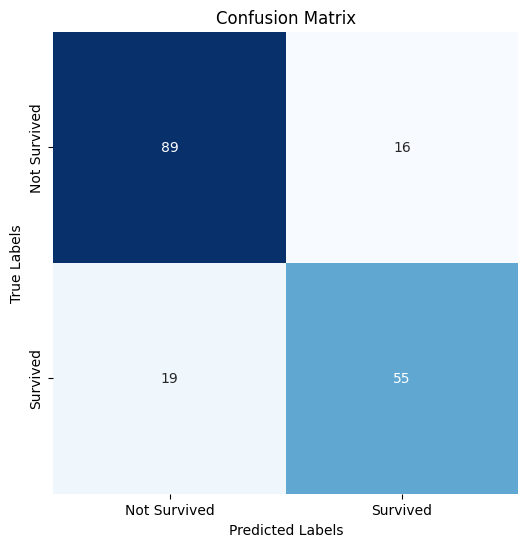

In [150]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

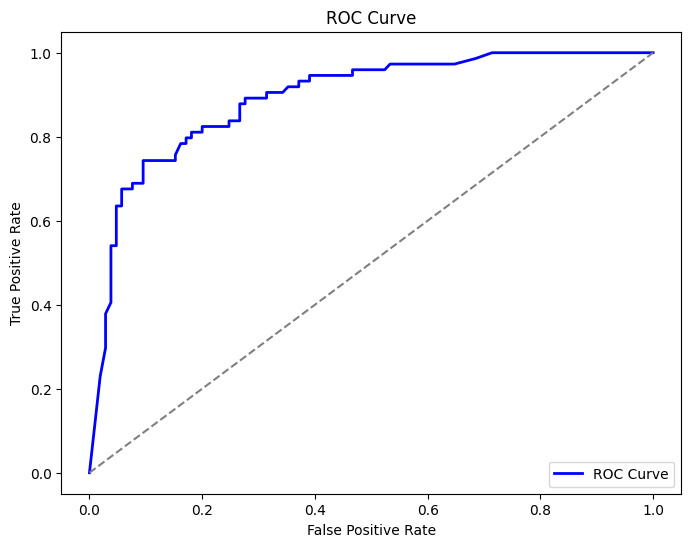

AUC-ROC Score: 0.89


In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities of class 1 (survived)
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, probs)
print(f'AUC-ROC Score: {auc_roc:.2f}')

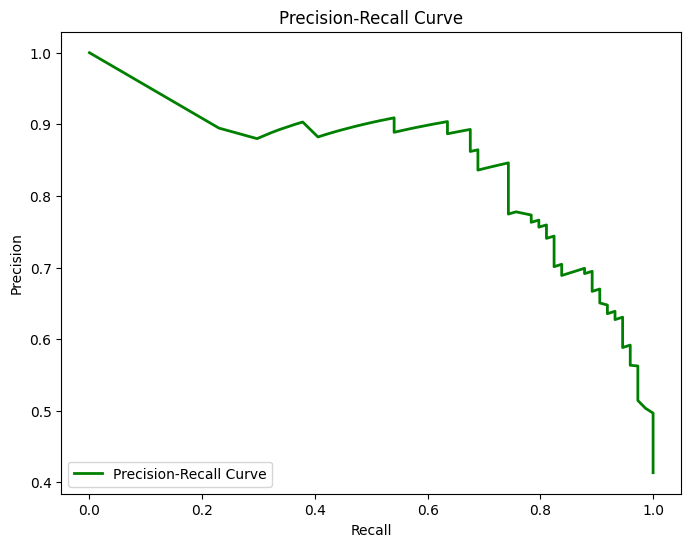

PR AUC Score: 0.85


In [152]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate PR AUC score
pr_auc = auc(recall, precision)
print(f'PR AUC Score: {pr_auc:.2f}')

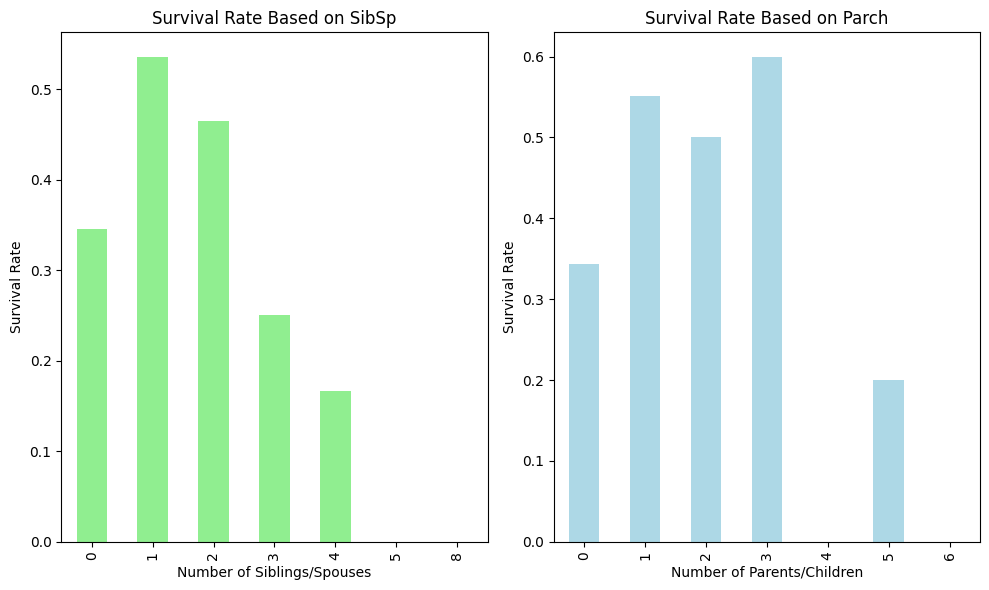

In [160]:
# Visualize survival rate based on SibSp and Parch
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
survival_by_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()
survival_by_sibsp.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate Based on SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

plt.subplot(1, 2, 2)
survival_by_parch = titanic_data.groupby('Parch')['Survived'].mean()
survival_by_parch.plot(kind='bar', color='lightblue')
plt.title('Survival Rate Based on Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

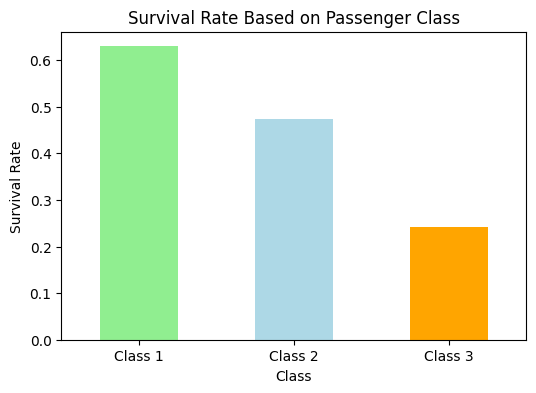

In [163]:
# Visualize survival rate based on passenger class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_class.plot(kind='bar', color=['lightgreen', 'lightblue', 'orange'])
plt.title('Survival Rate Based on Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.show()